In [1]:
import pandas as pd

In [2]:
path = "../../data/cleaned/merged_sales.csv"
car_sales = pd.read_csv(path)

In [3]:
car_sales2 = car_sales.reset_index(drop=True).set_index("Category")
car_sales3 = car_sales2.T.reset_index()
car_sales3.rename(columns={"index": "year"}, inplace=True)
car_sales3.rename(columns={"EV Sales": "ev_sales", "PHEV Sales": "phev_sales", "Production, total": "tot_prod", "Domestic sales, totalb": "tot_sales"}, inplace=True)

In [4]:
car_sales4 = car_sales3.drop(['Passenger cars', 'Commercial vehiclesa', 'Passenger cars', 'Commercial vehiclesa'], axis=1)
car_sales4["year"] = car_sales4["year"].astype(int)
car_sales4.head()

C:\Users\uv9374\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Category,year,ev_sales,phev_sales,tot_prod,tot_sales
0,2011,10092,7671,8662000,10109000
1,2012,14587,38584,10336000,11582000
2,2013,48094,49008,11067000,12479000
3,2014,63525,55357,11661000,13389000
4,2015,71064,42959,12106000,14128000


In [5]:
path2 = "../../data/cleaned/merged_energy_emission_data.csv"
emission_energy = pd.read_csv(path2)
emission_energy.columns

# unit of renewable energy - Trillion BTU, emission unit - Million Metric tons 

Index(['year', 'total_emission', 'transportation_emission', 'coal_emission',
       'natural_gas_emission', 'electricity_emission', 'petroleum_emission',
       'motor_emission', 'hydrocrabon_gas_emission', 'jet_fuel_emission',
       'distillate_fuel_emission', 'residual_fuel_emission',
       'lubricant_emission', 'aviation_gas_emission', 'industrial_emission',
       'residential_emission', 'commercial_emission', 'wood energy production',
       'biofuels production', 'total biomass energy production',
       'total renewable energy production', 'hydroelectric power consumption',
       'geothermal energy consumption', 'solar energy consumption',
       'wind energy consumption', 'wood energy consumption',
       'waste energy consumption', 'biofuels consumption',
       'total biomass energy consumption',
       'total renewable energy consumption', 'gdp_usd', 'gdp_growth_annual%',
       'gdp_per_energyuse', 'gasprice_per_gal', 'inflated_gasprice_gal',
       'emission_per_capita'

In [6]:
emission_energy2 = emission_energy[["year","total_emission", "transportation_emission", "motor_emission", 
                                    "total renewable energy consumption", "gdp_usd", "gdp_growth_annual%",
                                    "gasprice_per_gal", "inflated_gasprice_gal"]]

emission_energy3 = emission_energy2.rename(columns={"total renewable energy consumption": "tot_ren_energy"})
# emission_energy3 = emission_energy3.astype(float64)
emission_energy3.head()

# df = df.astype(int)

,year,total_emission,transportation_emission,motor_emission,tot_ren_energy,gdp_usd,gdp_growth_annual%,gasprice_per_gal,inflated_gasprice_gal
0,1990,"5,039.90","1,587.60",966.8,6040.024,5.960000e+12,1.89,1.22,2.41
1,1991,"4,994.60","1,567.90",962.4,6067.785,6.160000e+12,-0.11,1.20,2.27
2,1992,"5,094.90","1,591.60",979.1,5820.556,6.520000e+12,3.52,1.09,2.00
3,1993,"5,185.80","1,604.20",993.1,6081.635,6.860000e+12,2.75,1.07,1.90
4,1994,"5,263.60","1,644.10","1,004.10",5987.142,7.290000e+12,4.03,1.07,1.87


In [7]:
merge_df = pd.merge(left=car_sales4, right=emission_energy3, left_on='year', right_on='year')
merge_df.to_csv("../../data/cleaned/final_ml_data.csv", index=False)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [9]:
final_df = pd.read_csv("../../data/cleaned/final_ml_data.csv")

In [10]:
final_df.head()

,year,ev_sales,phev_sales,tot_prod,tot_sales,total_emission,transportation_emission,motor_emission,tot_ren_energy,gdp_usd,gdp_growth_annual%,gasprice_per_gal,inflated_gasprice_gal
0,2011,10092,7671,8662000,10109000,"5,445.70","1,809.00","1,057.00",9204.160,1.550000e+13,1.55,3.48,3.99
1,2012,14587,38584,10336000,11582000,"5,229.00","1,773.40","1,051.10",8847.119,1.620000e+13,2.25,3.55,3.99
2,2013,48094,49008,11067000,12479000,"5,356.00","1,796.40","1,066.00",9450.625,1.680000e+13,1.84,3.44,3.81
3,2014,63525,55357,11661000,13389000,"5,413.20","1,814.90","1,077.20",9740.360,1.750000e+13,2.45,3.30,3.59
4,2015,71064,42959,12106000,14128000,"5,262.90","1,838.80","1,083.10",9720.544,1.820000e+13,2.88,2.33,2.54


In [11]:
final_df["total_emission"] = final_df["total_emission"].apply(lambda x: float(x.split()[0].replace(',', '')))
final_df["transportation_emission"] = final_df["transportation_emission"].apply(lambda x: float(x.split()[0].replace(',', '')))
final_df["motor_emission"] = final_df["motor_emission"].apply(lambda x: float(x.split()[0].replace(',', '')))

In [12]:
# final_df.dtypes
final_df.columns

Index(['year', 'ev_sales', 'phev_sales', 'tot_prod', 'tot_sales',
       'total_emission', 'transportation_emission', 'motor_emission',
       'tot_ren_energy', 'gdp_usd', 'gdp_growth_annual%', 'gasprice_per_gal',
       'inflated_gasprice_gal'],
      dtype='object')

In [13]:
# R2 = 0.42
# X = finalized_df[["year"]]
# y = finalized_df["ev_sales"].values.reshape(-1,1)


# R2 = 0.68
# X = final_df[['tot_prod', 'tot_sales','total_emission', 'transportation_emission', 'motor_emission',
#                'tot_ren_energy', 'gdp_usd', 'gdp_growth_annual%', 'gasprice_per_gal',
#                'inflated_gasprice_gal']]
# y = final_df["ev_sales"].values.reshape(-1,1)

# R2 = 0.93
# X = final_df[['gasprice_per_gal',
#                'inflated_gasprice_gal']]
# y = final_df["ev_sales"].values.reshape(-1,1)

# R2 = -5.39
# X = final_df[['total_emission', 'transportation_emission', 'motor_emission']]
# y = final_df["ev_sales"].values.reshape(-1,1)

# R2 = 0.986
X = final_df[['tot_ren_energy',
              'gasprice_per_gal', 'inflated_gasprice_gal']]
y = final_df[["ev_sales"]].values.reshape(-1,1)

# R2 = 0.91
# X = final_df[['gdp_growth_annual%', 'gasprice_per_gal',
#                'inflated_gasprice_gal']]
# y = final_df["ev_sales"].values.reshape(-1,1)

# R2 = 0.87
# X = final_df[['tot_prod', 'tot_sales']]
# y = final_df["ev_sales"].values.reshape(-1,1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[ 4.06084730e+01  4.81296354e+05 -4.10974245e+05]]
y-axis intercept:  [-416742.32681396]


In [17]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

# Revising values of training and testing score
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.854806735515485
Testing Score: 0.9856411295570161


In [18]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

# Revising productivity of model by printing Mean Standard Error and R2 score
print(f"MSE: {MSE}, R2: {r2}")

MSE: 18683606.914867815, R2: 0.9856411295570161


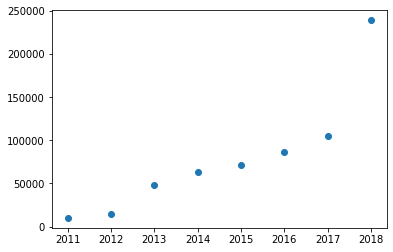

In [19]:
# R2 = 
# X1 = final_df[[' year', 'tot_prod', 'tot_sales','total_emission', 'transportation_emission', 'motor_emission',
#                'tot_ren_energy', 'gdp_usd', 'gdp_growth_annual%', 'gasprice_per_gal',
#                'inflated_gasprice_gal']]
# y1 = final_df["ev_sales"].values.reshape(-1,1)

X1 = final_df[['year']]
y1 = final_df["ev_sales"].values.reshape(-1,1)
plt.scatter(X1,y1)

In [20]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [21]:
model1 = LinearRegression()
model1.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
predictions1 = model1.predict(X1_test)
MSE1 = mean_squared_error(y1_test, predictions1)
r21 = model1.score(X1_test, y1_test)

print(f"MSE: {MSE1}, R2: {r21}")

MSE: 754913960.6559393, R2: 0.419827669997033


In [23]:
# We assume there is a positively correlated linear relationship between ev_sales through the range of time depicted below
ev_sales_lst = []
for x in range(2019,2026):
    new_t = model1.predict([[x]])
    ev_sales_lst.append(int(new_t))
ev_sales_lst

[206877, 233999, 261121, 288243, 315365, 342487, 369609]

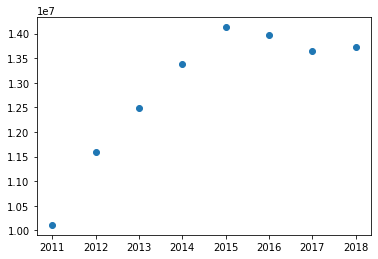

In [24]:
X2 = final_df[["year"]]
y2 = final_df["tot_sales"].values.reshape(-1,1)
plt.scatter(X2,y2)

In [25]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [26]:
model2 = LinearRegression()
model2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
predictions2 = model2.predict(X2_test)
MSE2 = mean_squared_error(y2_test, predictions2)
r22 = model2.score(X2_test, y2_test)

print(f"MSE: {MSE2}, R2: {r22}")

MSE: 100426516000.0, R2: 0.9294976570654233


In [28]:
tot_sales_lst = []
for x in range(2019,2026):
    new_x = model2.predict([[x]])
    tot_sales_lst.append(int(new_x))
tot_sales_lst

[14923140, 15387480, 15851820, 16316160, 16780500, 17244840, 17709180]

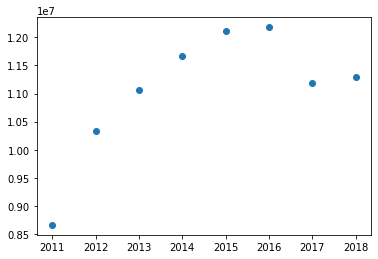

In [29]:
X3 = final_df[['year']]
y3 = final_df["tot_prod"].values.reshape(-1,1)
plt.scatter(X3,y3)

In [30]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

In [31]:
model3 = LinearRegression()
model3.fit(X3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
predictions3 = model3.predict(X3_test)
MSE3 = mean_squared_error(y3_test, predictions3)
r23 = model3.score(X3_test, y3_test)

print(f"MSE: {MSE3}, R2: {r23}")

MSE: 319543204000.0, R2: 0.6241039661962817


In [33]:
# We assume there is a positively correlated linear relationship between ev_sales through the range of time depicted below
tot_prod_lst = []
for x in range(2019,2026):
    new_t = model3.predict([[x]])
    tot_prod_lst.append(int(new_t))
tot_prod_lst

[12274670, 12569440, 12864210, 13158980, 13453750, 13748520, 14043290]

MSE: 316.5929999999635, R2: 0.8670581664875184


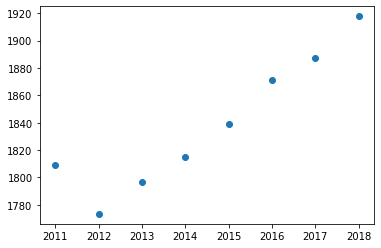

In [34]:
X4 = final_df[['year']]
y4 = final_df["transportation_emission"].values.reshape(-1,1)
plt.scatter(X4,y4)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=42)

model4 = LinearRegression()
model4.fit(X4_train,y4_train)

predictions4 = model4.predict(X4_test)
MSE4 = mean_squared_error(y4_test, predictions4)
r24 = model4.score(X4_test, y4_test)

print(f"MSE: {MSE4}, R2: {r24}")

In [35]:
transportation_emission = []
for x in range(2019,2026):
    new_t = model4.predict([[x]])
    transportation_emission.append(int(new_t))
transportation_emission

[1918, 1935, 1952, 1970, 1987, 2004, 2021]

MSE: 148.36900000000153, R2: 0.7672871287128689


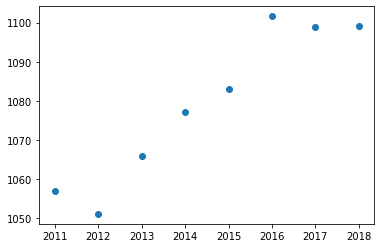

In [36]:
X5 = final_df[['year']]
y5 = final_df["motor_emission"].values.reshape(-1,1)
plt.scatter(X5,y5)

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, random_state=42)

model5 = LinearRegression()
model5.fit(X5_train,y5_train)

predictions5 = model5.predict(X5_test)
MSE5 = mean_squared_error(y5_test, predictions5)
r25 = model5.score(X5_test, y5_test)

print(f"MSE: {MSE5}, R2: {r25}")

In [37]:
motor_emission = []
for x in range(2019,2026):
    new_t = model5.predict([[x]])
    motor_emission.append(int(new_t))
motor_emission

[1108, 1115, 1121, 1128, 1134, 1141, 1147]

MSE: 81251.63133775636, R2: 0.8584756366329416


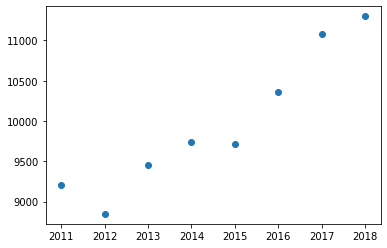

In [38]:
X6 = final_df[['year']]
y6 = final_df["tot_ren_energy"].values.reshape(-1,1)
plt.scatter(X6,y6)

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, random_state=42)

model6 = LinearRegression()
model6.fit(X6_train,y6_train)

predictions6 = model6.predict(X6_test)
MSE6 = mean_squared_error(y6_test, predictions6)
r26 = model6.score(X6_test, y6_test)

print(f"MSE: {MSE6}, R2: {r26}")

In [39]:
tot_ren_energy = []
for x in range(2019,2026):
    new_t = model6.predict([[x]])
    tot_ren_energy.append(int(new_t))
tot_ren_energy

[11481, 11804, 12126, 12449, 12772, 13095, 13418]

MSE: 3.044e+22, R2: 0.9805183999999999


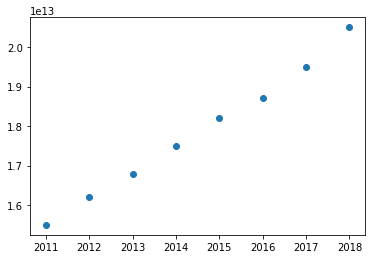

In [40]:
X7 = final_df[['year']]
y7 = final_df["gdp_usd"].values.reshape(-1,1)
plt.scatter(X7,y7)

X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, random_state=42)

model7 = LinearRegression()
model7.fit(X7_train,y7_train)

predictions7 = model7.predict(X7_test)
MSE7 = mean_squared_error(y7_test, predictions7)
r27 = model7.score(X7_test, y7_test)

print(f"MSE: {MSE7}, R2: {r27}")

In [41]:
gdp_usd = []
for x in range(2019,2026):
    new_t = model7.predict([[x]])
    gdp_usd.append(int(new_t))
gdp_usd

[21042000000000,
 21744000000000,
 22446000000000,
 23148000000000,
 23850000000000,
 24552000000000,
 25254000000000]

In [42]:
# # [[' year', 'tot_prod', 'tot_sales','total_emission', 'transportation_emission', 'motor_emission',
# #                'tot_ren_energy', 'gdp_usd', 'gdp_growth_annual%', 'gasprice_per_gal',
# #                'inflated_gasprice_gal']]

# X8 = final_df[['year']]
# y8 = final_df["gasprice_per_gal"].values.reshape(-1,1)
# plt.scatter(X8,y8)

# X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, random_state=42)

# model8 = LinearRegression()
# model8.fit(X8_train,y8_train)

# predictions8 = model8.predict(X8_test)
# MSE8 = mean_squared_error(y8_test, predictions8)
# r28 = model8.score(X8_test, y8_test)

# print(f"MSE: {MSE8}, R2: {r28}")

In [43]:
# gasprice_per_gal = []
# for x in range(2019,2026):
#     new_t = model8.predict([[x]])
#     gasprice_per_gal.append(int(new_t))
# gasprice_per_gal

In [44]:
# X9 = final_df[['year']]
# y9 = final_df["inflated_gasprice_gal"].values.reshape(-1,1)
# plt.scatter(X9,y9)

# X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, random_state=42)

# model9 = LinearRegression()
# model9.fit(X9_train,y9_train)

# predictions9 = model9.predict(X9_test)
# MSE9 = mean_squared_error(y9_test, predictions9)
# r29 = model9.score(X9_test, y9_test)

# print(f"MSE: {MSE9}, R2: {r29}")

In [45]:
# inflated_gasprice_gal = []
# for x in range(2019,2026):
#     new_t = model9.predict([[x]])
#     inflated_gasprice_gal.append(int(new_t))
# inflated_gasprice_gal

Text(0.5, 1.0, 'Residual Plot')

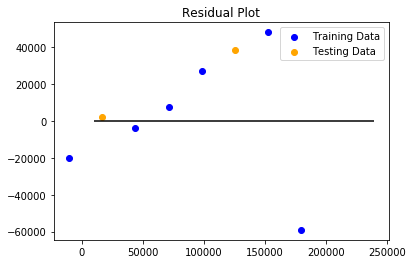

In [46]:
# Plotting residuals for training and testing data using plotly from matplotlib library
plt.scatter(model1.predict(X1_train), model1.predict(X1_train) - y1_train, c="blue", label="Training Data")
plt.scatter(model1.predict(X1_test), model1.predict(X1_test) - y1_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

Text(0.5, 1.0, 'Residual Plot')

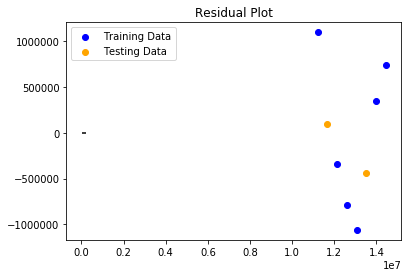

In [47]:
plt.scatter(model2.predict(X2_train), model2.predict(X2_train) - y2_train, c="blue", label="Training Data")
plt.scatter(model2.predict(X2_test), model2.predict(X2_test) - y2_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [48]:
years = [2019,2020,2021,2022,2023,2024,2025]
# years_df = pd.DataFrame(years, columns=['year'])
# df = pd.DataFrame(ev_sales_lst, columns=['ev_sales'])
# df1 = pd.DataFrame(tot_sales_lst, columns=['total_sales'])

In [50]:
d = {'year': years, 'tot_sales': tot_sales_lst, 'ev_sales': ev_sales_lst, 'tot_prod': tot_prod_lst,
    'transportation_emission': transportation_emission, 'motor_emission': motor_emission, 'tot_ren_energy': tot_ren_energy,
    'gdp_usd': gdp_usd}
sale_prediction_df = pd.DataFrame(d)
sale_prediction_df.head(10)

,year,tot_sales,ev_sales,tot_prod,transportation_emission,motor_emission,tot_ren_energy,gdp_usd
0,2019,14923140,206877,12274670,1918,1108,11481,21042000000000
1,2020,15387480,233999,12569440,1935,1115,11804,21744000000000
2,2021,15851820,261121,12864210,1952,1121,12126,22446000000000
3,2022,16316160,288243,13158980,1970,1128,12449,23148000000000
4,2023,16780500,315365,13453750,1987,1134,12772,23850000000000
5,2024,17244840,342487,13748520,2004,1141,13095,24552000000000
6,2025,17709180,369609,14043290,2021,1147,13418,25254000000000


In [57]:
prediction_data = pd.concat([final_df, sale_prediction_df])
prediction_data= prediction_data.fillna(0)
prediction_data.head()

,year,ev_sales,phev_sales,tot_prod,tot_sales,total_emission,transportation_emission,motor_emission,tot_ren_energy,gdp_usd,gdp_growth_annual%,gasprice_per_gal,inflated_gasprice_gal
0,2011,10092,7671.0,8662000,10109000,5445.7,1809.0,1057.0,9204.160,1.550000e+13,1.55,3.48,3.99
1,2012,14587,38584.0,10336000,11582000,5229.0,1773.4,1051.1,8847.119,1.620000e+13,2.25,3.55,3.99
2,2013,48094,49008.0,11067000,12479000,5356.0,1796.4,1066.0,9450.625,1.680000e+13,1.84,3.44,3.81
3,2014,63525,55357.0,11661000,13389000,5413.2,1814.9,1077.2,9740.360,1.750000e+13,2.45,3.30,3.59
4,2015,71064,42959.0,12106000,14128000,5262.9,1838.8,1083.1,9720.544,1.820000e+13,2.88,2.33,2.54


In [58]:
prediction_data.to_csv("../../data/cleaned/final_ml_prediction_data.csv", index=False)